# Apriori Algorithm
## Apriori algorithm implementation using mlxtend

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
pip install mlxtend

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\student\\anaconda3\\lib\\site-packages\\threadpoolctl.py'



   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB 5.2 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.4 MB 6.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.4 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.1 MB 8.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/11.1 MB 7.7 MB/s eta 0:00:02
   --- ------------------------------------ 1.1/11.1 MB 7.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/11.1 MB 7.5 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 7.0 MB/s eta 0:00:02
   ------- ---------

In [6]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [10]:
data = [['A','B','C','D'],['B','C','D'],['A','C','D','B'],['A','B','D']]
te = TransactionEncoder()
te_array=te.fit_transform(data)
df = pd.DataFrame(te_array, columns=te.columns_)
te

TransactionEncoder()

In [11]:
te_array

array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False,  True]])

In [12]:
df

,A,B,C,D
0,True,True,True,True
1,False,True,True,True
2,True,True,True,True
3,True,True,False,True


In [17]:
frq_items = apriori(df, min_support=0.7, use_colnames=True)
frq_items

,support,itemsets
0,0.75,(A)
1,1.00,(B)
2,0.75,(C)
3,1.00,(D)
4,0.75,"(A, B)"
5,0.75,"(A, D)"
6,0.75,"(B, C)"
7,1.00,"(B, D)"
8,0.75,"(C, D)"
9,0.75,"(A, B, D)"


In [20]:
rules = association_rules(frq_items, metric='confidence', min_threshold=0.8, num_itemsets=3)
print(rules[['antecedents', 'consequents', 'support', 'confidence']])

   antecedents consequents  support  confidence
0          (A)         (B)     0.75         1.0
1          (A)         (D)     0.75         1.0
2          (C)         (B)     0.75         1.0
3          (B)         (D)     1.00         1.0
4          (D)         (B)     1.00         1.0
5          (C)         (D)     0.75         1.0
6       (A, B)         (D)     0.75         1.0
7       (A, D)         (B)     0.75         1.0
8          (A)      (B, D)     0.75         1.0
9       (B, C)         (D)     0.75         1.0
10      (C, D)         (B)     0.75         1.0
11         (C)      (B, D)     0.75         1.0


C:\Users\Student\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


In [24]:
rules # no need to write

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(A),(B),0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
1,(A),(D),0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
2,(C),(B),0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
3,(B),(D),1.00,1.0,1.00,1.0,1.0,1.0,0.0,inf,0.0,1.00,0.0,1.000
4,(D),(B),1.00,1.0,1.00,1.0,1.0,1.0,0.0,inf,0.0,1.00,0.0,1.000
5,(C),(D),0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
6,"(A, B)",(D),0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
7,"(A, D)",(B),0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
8,(A),"(B, D)",0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875
9,"(B, C)",(D),0.75,1.0,0.75,1.0,1.0,1.0,0.0,inf,0.0,0.75,0.0,0.875


# Regression Analysis
## To perform regression analysis using Sci-kit learn package in Python

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [22]:
dataset = pd.read_csv('weather.csv')
print(dataset.shape)

(366, 22)


In [25]:
print(dataset.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  363.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.481517   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    5.950000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     364.000000    359.000000    366.000000   366.000000   366.000000   
mean       39.840659      9.651811     17.986339    72.035519    44.519126   
std        13.059807      7.951929      8.856997    13.137058    16.850947   
min        13.000000      0.000000      0.000000    36.00

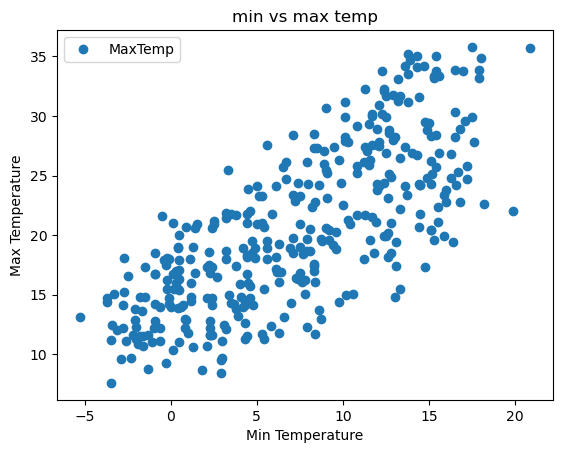

In [29]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('min vs max temp')
plt.xlabel('Min Temperature')
plt.ylabel('Max Temperature')
plt.show()

### X => independent (I/P)
### y => depemndent (O/P)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_predict = model.predict(X_test)

In [41]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})
df

,Actual,Predicted
0,15.5,18.972425
1,24.4,22.807641
2,21.0,18.887198
3,16.8,15.563344
4,21.8,18.120155
...,...,...
69,16.8,16.330387
70,12.2,11.983808
71,20.7,26.642858
72,30.7,22.040598


In [43]:
print('Intercept: ', model.intercept_)
print('Coefficient: ', model.coef_)

Intercept:  [14.37016508]
Coefficient:  [[0.85227034]]


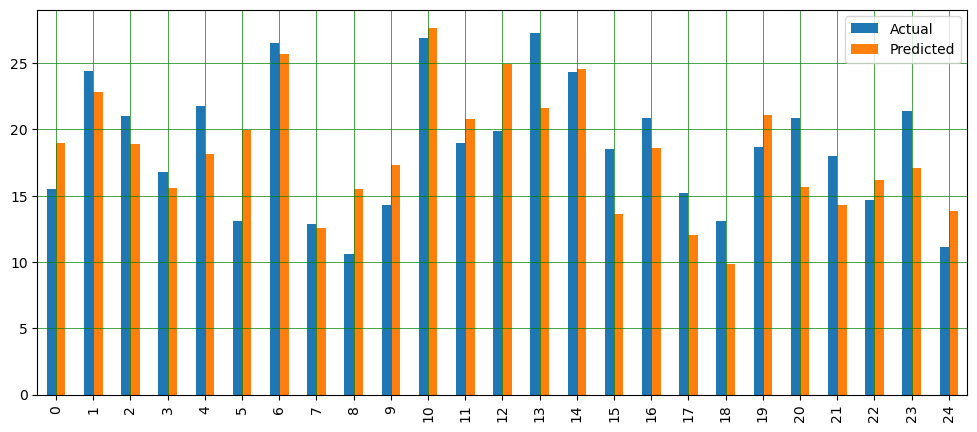

In [48]:
df2 = df.head(25)
df2.plot(kind='bar', figsize=(12,5))
plt.grid(which='major', linestyle='-', linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5',color='blue')
plt.show()

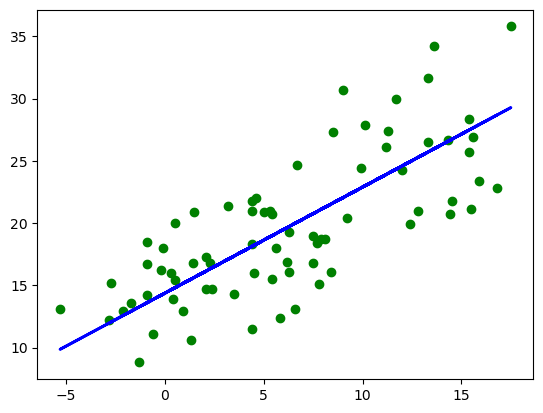

In [52]:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_predict, color='blue', linewidth=2)
# plt.plot(X_test, y_test, color='red', linewidth=2)

plt.show()

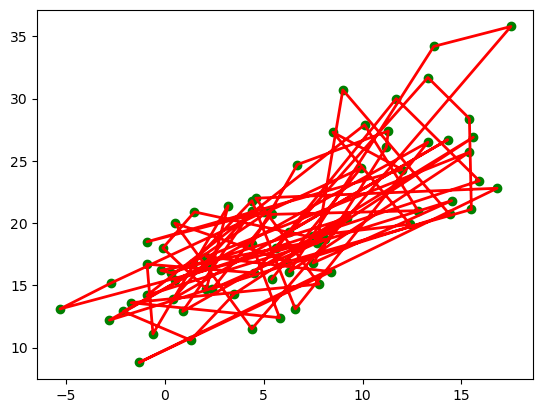

In [53]:
plt.scatter(X_test, y_test, color='green')
# plt.plot(X_test, y_predict, color='blue', linewidth=2)
plt.plot(X_test, y_test, color='red', linewidth=2)

plt.show()

In [55]:
print('mean absolute erro: ', metrics.mean_absolute_error(y_test,y_predict))
print('mean squared erro: ', metrics.mean_squared_error(y_test,y_predict))
print('root mean squared erro: ', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

mean absolute erro:  3.2315703266414273
mean squared erro:  15.004824151088782
root mean squared erro:  3.873606091368711
